<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Necessary-Library" data-toc-modified-id="Importing-Necessary-Library-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Necessary Library</a></span></li><li><span><a href="#Single-File-Audio-Voice-to-Text-Conversion" data-toc-modified-id="Single-File-Audio-Voice-to-Text-Conversion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Single File Audio Voice to Text Conversion</a></span></li><li><span><a href="#Splitting-the-Customer-conversation-and-Care-voice" data-toc-modified-id="Splitting-the-Customer-conversation-and-Care-voice-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Splitting the Customer conversation and Care voice</a></span></li><li><span><a href="#Reading-Multiple-File-Audio-Voice-to-Text-Conversion" data-toc-modified-id="Reading-Multiple-File-Audio-Voice-to-Text-Conversion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reading Multiple File Audio Voice to Text Conversion</a></span></li><li><span><a href="#Splitting-the-Customer-conversation-and-Care-voice" data-toc-modified-id="Splitting-the-Customer-conversation-and-Care-voice-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Splitting the Customer conversation and Care voice</a></span></li><li><span><a href="#Reading-Multiple-File-Audio-Voice-to-Text-Conversion-Using-Google-Cloud-API" data-toc-modified-id="Reading-Multiple-File-Audio-Voice-to-Text-Conversion-Using-Google-Cloud-API-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Reading Multiple File Audio Voice to Text Conversion Using Google Cloud API</a></span></li><li><span><a href="#Loading-the-Converted-Text-Data-For-Classification" data-toc-modified-id="Loading-the-Converted-Text-Data-For-Classification-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Loading the Converted Text Data For Classification</a></span></li><li><span><a href="#Number-of-Words" data-toc-modified-id="Number-of-Words-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Number of Words</a></span></li><li><span><a href="#Creating-the-Call-Duration-column" data-toc-modified-id="Creating-the-Call-Duration-column-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Creating the Call Duration column</a></span></li><li><span><a href="#Number-of-characters" data-toc-modified-id="Number-of-characters-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Number of characters</a></span></li><li><span><a href="#Average-Word-Length" data-toc-modified-id="Average-Word-Length-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Average Word Length</a></span></li><li><span><a href="#Number-of-stop-words" data-toc-modified-id="Number-of-stop-words-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Number of stop words</a></span></li><li><span><a href="#Number-of-special-characters" data-toc-modified-id="Number-of-special-characters-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Number of special characters</a></span></li><li><span><a href="#Number-of-numerics" data-toc-modified-id="Number-of-numerics-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Number of numerics</a></span></li><li><span><a href="#Number-of-Uppercase-words" data-toc-modified-id="Number-of-Uppercase-words-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Number of Uppercase words</a></span></li><li><span><a href="#Tagert-Class-Identification" data-toc-modified-id="Tagert-Class-Identification-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Tagert Class Identification</a></span></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Pre-processing</a></span></li><li><span><a href="#Generating-the-Sentiment-of-the-Call" data-toc-modified-id="Generating-the-Sentiment-of-the-Call-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Generating the Sentiment of the Call</a></span></li><li><span><a href="#Test-Train-Split" data-toc-modified-id="Test-Train-Split-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Test Train Split</a></span></li><li><span><a href="#Vectorizing" data-toc-modified-id="Vectorizing-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Vectorizing</a></span></li><li><span><a href="#Base-Model-Fitting" data-toc-modified-id="Base-Model-Fitting-21"><span class="toc-item-num">21&nbsp;&nbsp;</span>Base Model Fitting</a></span></li><li><span><a href="#Train-Metrics" data-toc-modified-id="Train-Metrics-22"><span class="toc-item-num">22&nbsp;&nbsp;</span>Train Metrics</a></span></li><li><span><a href="#Test-Metrics" data-toc-modified-id="Test-Metrics-23"><span class="toc-item-num">23&nbsp;&nbsp;</span>Test Metrics</a></span></li><li><span><a href="#Model-Pipe-Lining-For-New-Prediction" data-toc-modified-id="Model-Pipe-Lining-For-New-Prediction-24"><span class="toc-item-num">24&nbsp;&nbsp;</span>Model Pipe Lining For New Prediction</a></span></li><li><span><a href="#Predicting-The-New-Speech-to-Text-Data" data-toc-modified-id="Predicting-The-New-Speech-to-Text-Data-25"><span class="toc-item-num">25&nbsp;&nbsp;</span>Predicting The New Speech to Text Data</a></span></li><li><span><a href="#THE-END" data-toc-modified-id="THE-END-26"><span class="toc-item-num">26&nbsp;&nbsp;</span>THE END</a></span></li></ul></div>

# Importing Necessary Library 

In [1]:
import speech_recognition as sr
import os 
from pydub import AudioSegment 
from tqdm import tqdm
from pydub.silence import split_on_silence
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import itertools
from textblob import TextBlob
from sklearn.pipeline import Pipeline
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',-1)

C:\Users\user\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Single File Audio Voice to Text Conversion

In [2]:
#AUDIO_FILE = "AUDIO-2020-05-14-14-47-49.wav"
AUDIO_FILE = "251-118436-0000.flac"
#AUDIO_FILE = "8th Street.wav"
#AUDIO_FILE = "8th Street2.wav"
#AUDIO_FILE = "Call 1.wav"
# use the audio file as the audio source
#AUDIO_FILE = "*.wav"
r = sr.Recognizer()
with sr.AudioFile(AUDIO_FILE) as source:
    audio = r.record(source)  # read the entire audio file

print("Google Speech Recognition Says you said: \n" + r.recognize_google(audio))

Google Speech Recognition Says you said: 
now spirit item no poison work and his wife


In [3]:
x=r.recognize_google(audio)

Creating the Data frame With Converted text

In [4]:
df = pd.DataFrame() 

In [5]:
df = pd.DataFrame([x], columns=list('a'))

In [6]:
df

,a
0,now spirit item no poison work and his wife


# Splitting the Customer conversation and Care voice

In [7]:
new= df['a'].str.split("hello", n = 2, expand=True)

In [8]:
new

,0
0,now spirit item no poison work and his wife


In [9]:
new.rename(columns = {0 :'cust', 1:'agent'}, inplace = True)

In [10]:
new

,cust
0,now spirit item no poison work and his wife


In [11]:
validation=new[["cust"]]

In [12]:
validation

,cust
0,now spirit item no poison work and his wife


# Reading Multiple File Audio Voice to Text Conversion

For Reading Multiple File and converting it I have used the below mentioned packages

1.import os

2.import speech_recognition as sr

3.from tqdm import tqdm

In [13]:
r = sr.Recognizer()
files=sorted(os.listdir('parts/'))

In [14]:
all_text = []

for f in tqdm(files):
    name = "parts/" + f
    # Load audio file
    with sr.AudioFile(name) as source:
        audio = r.record(source)  # read the entire audio file
    text= r.recognize_google(audio)
    all_text.append(text)

100%|████████████████████████████████████████████| 4/4 [01:13<00:00, 18.37s/it]


In [15]:
all_text

['now spirit item no poison work and his wife',
 'hi this is Shrinath my husband and I have stayed in this hotel a few times do not the fanciest hotel we love the fact that we can walk the 900 miles to send it is screen on the staff is very accommodating my only come. Is that define in the bathroom was noisy and went automatically when U turn light on thank you hello myself Rachel from Sky customer support thank you for the feedback madam I will take necessary action on the concerned person will come to the room shortly thank you',
 'hi myself Shrinath I book the hotel through hot wear at the lowest price I could fine when we got their different as manager gave us smoking room argued that I have a little baby and I would not have booked the room had I known it was smoking the manager would not hear anything and told me that hardware books the cheapest rooms are available hello myself Rachel thank you for the call I will keep you posted on the feedback shirt the corresponding team will 

Creating the Data frame With Converted text

In [16]:
df = pd.DataFrame() 

In [17]:
df = pd.DataFrame([all_text])

In [18]:
df

,0,1,2,3
0,now spirit item no poison work and his wife,hi this is Shrinath my husband and I have stayed in this hotel a few times do not the fanciest hotel we love the fact that we can walk the 900 miles to send it is screen on the staff is very accommodating my only come. Is that define in the bathroom was noisy and went automatically when U turn light on thank you hello myself Rachel from Sky customer support thank you for the feedback madam I will take necessary action on the concerned person will come to the room shortly thank you,hi myself Shrinath I book the hotel through hot wear at the lowest price I could fine when we got their different as manager gave us smoking room argued that I have a little baby and I would not have booked the room had I known it was smoking the manager would not hear anything and told me that hardware books the cheapest rooms are available hello myself Rachel thank you for the call I will keep you posted on the feedback shirt the corresponding team will revert back to you shortly,hi my friend heart I stayed in a hotel for Fast Five days and I am calling to the customer care for further information needed and the service provided so the rooms are not it clean could you please make someone to clean the room hello hi this is Rachel from service desk thanks for the call I'll send you the person start Lisa thank you


In [19]:
df=pd.melt(df)

In [20]:
df

,variable,value
0,0,now spirit item no poison work and his wife
1,1,hi this is Shrinath my husband and I have stayed in this hotel a few times do not the fanciest hotel we love the fact that we can walk the 900 miles to send it is screen on the staff is very accommodating my only come. Is that define in the bathroom was noisy and went automatically when U turn light on thank you hello myself Rachel from Sky customer support thank you for the feedback madam I will take necessary action on the concerned person will come to the room shortly thank you
2,2,hi myself Shrinath I book the hotel through hot wear at the lowest price I could fine when we got their different as manager gave us smoking room argued that I have a little baby and I would not have booked the room had I known it was smoking the manager would not hear anything and told me that hardware books the cheapest rooms are available hello myself Rachel thank you for the call I will keep you posted on the feedback shirt the corresponding team will revert back to you shortly
3,3,hi my friend heart I stayed in a hotel for Fast Five days and I am calling to the customer care for further information needed and the service provided so the rooms are not it clean could you please make someone to clean the room hello hi this is Rachel from service desk thanks for the call I'll send you the person start Lisa thank you


# Splitting the Customer conversation and Care voice

In [21]:
new= df['value'].str.split("hello", n = 2, expand=True)

In [22]:
new

,0,1
0,now spirit item no poison work and his wife,None
1,hi this is Shrinath my husband and I have stayed in this hotel a few times do not the fanciest hotel we love the fact that we can walk the 900 miles to send it is screen on the staff is very accommodating my only come. Is that define in the bathroom was noisy and went automatically when U turn light on thank you,myself Rachel from Sky customer support thank you for the feedback madam I will take necessary action on the concerned person will come to the room shortly thank you
2,hi myself Shrinath I book the hotel through hot wear at the lowest price I could fine when we got their different as manager gave us smoking room argued that I have a little baby and I would not have booked the room had I known it was smoking the manager would not hear anything and told me that hardware books the cheapest rooms are available,myself Rachel thank you for the call I will keep you posted on the feedback shirt the corresponding team will revert back to you shortly
3,hi my friend heart I stayed in a hotel for Fast Five days and I am calling to the customer care for further information needed and the service provided so the rooms are not it clean could you please make someone to clean the room,hi this is Rachel from service desk thanks for the call I'll send you the person start Lisa thank you


In [23]:
new.rename(columns = {0 :'cust', 1:'agent'}, inplace = True)

In [24]:
new

,cust,agent
0,now spirit item no poison work and his wife,None
1,hi this is Shrinath my husband and I have stayed in this hotel a few times do not the fanciest hotel we love the fact that we can walk the 900 miles to send it is screen on the staff is very accommodating my only come. Is that define in the bathroom was noisy and went automatically when U turn light on thank you,myself Rachel from Sky customer support thank you for the feedback madam I will take necessary action on the concerned person will come to the room shortly thank you
2,hi myself Shrinath I book the hotel through hot wear at the lowest price I could fine when we got their different as manager gave us smoking room argued that I have a little baby and I would not have booked the room had I known it was smoking the manager would not hear anything and told me that hardware books the cheapest rooms are available,myself Rachel thank you for the call I will keep you posted on the feedback shirt the corresponding team will revert back to you shortly
3,hi my friend heart I stayed in a hotel for Fast Five days and I am calling to the customer care for further information needed and the service provided so the rooms are not it clean could you please make someone to clean the room,hi this is Rachel from service desk thanks for the call I'll send you the person start Lisa thank you


In [25]:
validation=new[["cust"]]

In [26]:
validation

,cust
0,now spirit item no poison work and his wife
1,hi this is Shrinath my husband and I have stayed in this hotel a few times do not the fanciest hotel we love the fact that we can walk the 900 miles to send it is screen on the staff is very accommodating my only come. Is that define in the bathroom was noisy and went automatically when U turn light on thank you
2,hi myself Shrinath I book the hotel through hot wear at the lowest price I could fine when we got their different as manager gave us smoking room argued that I have a little baby and I would not have booked the room had I known it was smoking the manager would not hear anything and told me that hardware books the cheapest rooms are available
3,hi my friend heart I stayed in a hotel for Fast Five days and I am calling to the customer care for further information needed and the service provided so the rooms are not it clean could you please make someone to clean the room


# Reading Multiple File Audio Voice to Text Conversion Using Google Cloud API

For Reading Multiple File and converting it I have used the below mentioned packages

pip Install google-api-python-client==1.6.4

1.import os

2.import speech_recognition as sr

3.from tqdm import tqdm

4.Google Cloud API Generated Key File

Steps For Generation Google Cloud API Key File

1. Sign Up for a Free Tier Account


Google Cloud offers a Free Tier plan, which will be used in this POC. An account is required to get an API key.


2. Generate an API Key


Follow these steps to generate an API key:


Sign-in to Google Cloud Console


Click “APIs & Services”


Click “Credentials”


Click “Create Credentials”


Select “Service Account Key”


Under “Service Account” select “New service account”


Name service (whatever you’d like)


Select Role: “Project” -> “Owner”


Leave “JSON” option selected


Click “Create”


Save generated API key file


Rename file to api-key.json


Make sure to move the key into Code repo, if you plan to test this code.

In [27]:
with open("api-key.json") as f:
    GOOGLE_CLOUD_SPEECH_CREDENTIALS = f.read()

In [28]:
r = sr.Recognizer()
files=sorted(os.listdir('parts/'))

In [29]:
all_text = []

for f in tqdm(files):
    name = "parts/" + f
    # Load audio file
    with sr.AudioFile(name) as source:
        audio = r.record(source)
    # Transcribe audio file
    text = r.recognize_google_cloud(audio, credentials_json=GOOGLE_CLOUD_SPEECH_CREDENTIALS)
    all_text.append(text)

100%|████████████████████████████████████████████| 4/4 [02:05<00:00, 31.34s/it]


In [30]:
all_text

['he was young no spearhead touched him no poison lurked in his wine ',
 'hi this is Trina. My husband and I have stayed in this hotel a few times the fanciest hotel will allow the time that we can walk the Earth 2 miles to it is clean and the stuff is very accommodating in the bathroom was noisy and went automatically when you turn the light on thank you hello myself Rachel from customer support thank you for the feedback modem I will take necessary action on the concerned person will come to the room shortly thank you ',
 'hi myself Trainor. I booked a hotel through Hotwire at the lowest price I could find when we go dead the front desk manager gave us a smoking-room i argued that I have a little baby and I would not have booked the room had I known it was smoking the manager would not hear anything and told me that Hotwire books the cheapest rooms are available hello not myself Rachel thank you for the call I will keep you posted on the feedback shirt the corresponding team will rev

# Loading the Converted Text Data For Classification

In [31]:
train = pd.read_csv("train.csv")

In [32]:
train.Is_Response.unique()

array(['Room and Food', 'Price', 'Hotel Management', 'service',
       'Appriciation', 'Criticism'], dtype=object)

In [33]:
train.head()

,User_ID,Description,Is_Response
0,id10326,The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.,Room and Food
1,id10327,"I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerving! I would stay here again for business, but would not come here on vacation.",Room and Food
2,id10328,"I booked this hotel through Hotwire at the lowest price I could find. When we got there the front desk manager gave us a """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""smoking"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" room. I argued that I have a little baby and I would not have booked the room had I known it was smoking. The manager would not hear anything further and told me that Hotwire books the cheapest rooms that are available. So, from the get go I was very unhappy.\nAfter a great deal of persuasion and discussion, I got a nonsmoking room. Thereafter the room had the most minimal amenities. Besides the great location (near Dupont Circle), there was not much to say about this overpriced hotel. The room was small and in OK condition. The bathroom was small with a tub. The bathroom amenities were also minimal. We did not have a fridge or a microwave and had to again rent a fridge from the staff (to keep baby things).\nThe parking costs $-- per day so it is best not to drive here. Also the breakfast is not included. The lobby is very small and feels old. The only thing available is coffee in the lobby which is decent.\nAll in all, poor service, minimal amenities, small rooms, small bathrooms, no view, but great location. Some distance from the metro (either McPherson station or Dupont station). Try to look for better if available.",Price
3,id10329,"Stayed here with husband and sons on the way to an Alaska Cruise. We all loved the hotel, great experience. Ask for a room on the North tower, facing north west for the best views. We had a high floor, with a stunning view of the needle, the city, and even the cruise ships! We ordered room service for dinner so we could enjoy the perfect views. Room service dinners were delicious, too! You are in a perfect spot to walk everywhere, so enjoy the city. Almost forgot- Heavenly beds were heavenly, too!",Hotel Management
4,id10330,"My girlfriends and I stayed here to celebrate our --th birthdays. We had planned this weekend getaway back in February, so we were all looking forward to it. There was - of us so we rented - ajoining rooms at the rate of $----night-room. We stayed - nights so with taxes and parking charges we spent in total over $----. All of us expected a certain level of service since we were staying at the Ritz, however this hotel certainly didn't meet what we would consider Ritz standards.\nThe rooms were fine. They were clean with well appointed bathrooms, but nothing to get excited about. The service however was awful. The first night we

In [34]:
train.shape

(38932, 3)

In [35]:
train.isna().sum()

User_ID        0
Description    0
Is_Response    0
dtype: int64

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 3 columns):
User_ID        38932 non-null object
Description    38932 non-null object
Is_Response    38932 non-null object
dtypes: object(3)
memory usage: 456.3+ KB


# Number of Words

In [37]:
train['word_count'] = train['Description'].apply(lambda x: len(str(x).split(" ")))
train[['Description','word_count']].head()

,Description,word_count
0,The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.,46
1,"I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerving! I would stay here again for business, but would not come here on vacation.",208
2,"I booked this hotel through Hotwire at the lowest price I could find. When we got there the front desk manager gave us a """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""smoking"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" room. I argued that I have a little baby and I would not have booked the room had I known it was smoking. The manager would not hear anything further and told me that Hotwire books the cheapest rooms that are available. So, from the get go I was very unhappy.\nAfter a great deal of persuasion and discussion, I got a nonsmoking room. Thereafter the room had the most minimal amenities. Besides the great location (near Dupont Circle), there was not much to say about this overpriced hotel. The room was small and in OK condition. The bathroom was small with a tub. The bathroom amenities were also minimal. We did not have a fridge or a microwave and had to again rent a fridge from the staff (to keep baby things).\nThe parking costs $-- per day so it is best not to drive here. Also the breakfast is not included. The lobby is very small and feels old. The only thing available is coffee in the lobby which is decent.\nAll in all, poor service, minimal amenities, small rooms, small bathrooms, no view, but great location. Some distance from the metro (either McPherson station or Dupont station). Try to look for better if available.",229
3,"Stayed here with husband and sons on the way to an Alaska Cruise. We all loved the hotel, great experience. Ask for a room on the North tower, facing north west for the best views. We had a high floor, with a stunning view of the needle, the city, and even the cruise ships! We ordered room service for dinner so we could enjoy the perfect views. Room service dinners were delicious, too! You are in a perfect spot to walk everywhere, so enjoy the city. Almost forgot- Heavenly beds were heavenly, too!",93
4,"My girlfriends and I stayed here to celebrate our --th birthdays. We had planned this weekend getaway back in February, so we were all looking forward to it. There was - of us so we rented - ajoining rooms at the rate of $----night-room. We stayed - nights so with taxes and parking charges we spent in total over $----. All of us expected a certain level of service since we were staying at the Ritz, however this hotel certainly didn't meet what we would consider Ritz standards.\nThe rooms were fine. They were clean with well appointed bathrooms, but nothing to get excited about. The service however was awful. The first night we were there, I made -- calls to the bell man, before someone in hotel communications p

In [38]:
train.describe()

,word_count
count,38932.000000
mean,155.979605
std,130.011018
min,1.000000
25%,72.000000
50%,122.000000
75%,197.000000
max,2289.000000


# Creating the Call Duration column 


From the audio clips Could see that for 1 sec average words spoken is 3 and for 1 mins we have 60 seconds so for 1 hr we have 3600 secs so 3*3600 =10800 words can be spoken in 1 hr.formula = (3/10800)3600

In [39]:
train['call_duration_secs']= train['word_count']/10800 * 3600

In [40]:
train.describe()

,word_count,call_duration_secs
count,38932.000000,38932.000000
mean,155.979605,51.993202
std,130.011018,43.337006
min,1.000000,0.333333
25%,72.000000,24.000000
50%,122.000000,40.666667
75%,197.000000,65.666667
max,2289.000000,763.000000


# Number of characters

In [41]:
train['char_count'] = train['Description'].str.len() ## this also includes spaces
train[['Description','char_count']].head()

,Description,char_count
0,The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.,248
1,"I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerving! I would stay here again for business, but would not come here on vacation.",1077
2,"I booked this hotel through Hotwire at the lowest price I could find. When we got there the front desk manager gave us a """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""smoking"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" room. I argued that I have a little baby and I would not have booked the room had I known it was smoking. The manager would not hear anything further and told me that Hotwire books the cheapest rooms that are available. So, from the get go I was very unhappy.\nAfter a great deal of persuasion and discussion, I got a nonsmoking room. Thereafter the room had the most minimal amenities. Besides the great location (near Dupont Circle), there was not much to say about this overpriced hotel. The room was small and in OK condition. The bathroom was small with a tub. The bathroom amenities were also minimal. We did not have a fridge or a microwave and had to again rent a fridge from the staff (to keep baby things).\nThe parking costs $-- per day so it is best not to drive here. Also the breakfast is not included. The lobby is very small and feels old. The only thing available is coffee in the lobby which is decent.\nAll in all, poor service, minimal amenities, small rooms, small bathrooms, no view, but great location. Some distance from the metro (either McPherson station or Dupont station). Try to look for better if available.",1327
3,"Stayed here with husband and sons on the way to an Alaska Cruise. We all loved the hotel, great experience. Ask for a room on the North tower, facing north west for the best views. We had a high floor, with a stunning view of the needle, the city, and even the cruise ships! We ordered room service for dinner so we could enjoy the perfect views. Room service dinners were delicious, too! You are in a perfect spot to walk everywhere, so enjoy the city. Almost forgot- Heavenly beds were heavenly, too!",502
4,"My girlfriends and I stayed here to celebrate our --th birthdays. We had planned this weekend getaway back in February, so we were all looking forward to it. There was - of us so we rented - ajoining rooms at the rate of $----night-room. We stayed - nights so with taxes and parking charges we spent in total over $----. All of us expected a certain level of service since we were staying at the Ritz, however this hotel certainly didn't meet what we would consider Ritz standards.\nThe rooms were fine. They were clean with well appointed bathrooms, but nothing to get excited about. The service however was awful. The first night we were there, I made -- calls to the bell man, before someone in hotel communicatio

# Average Word Length

In [42]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['Description'].apply(lambda x: avg_word(x))
train[['Description','avg_word']].head()

,Description,avg_word
0,The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.,4.413043
1,"I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerving! I would stay here again for business, but would not come here on vacation.",4.182692
2,"I booked this hotel through Hotwire at the lowest price I could find. When we got there the front desk manager gave us a """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""smoking"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" room. I argued that I have a little baby and I would not have booked the room had I known it was smoking. The manager would not hear anything further and told me that Hotwire books the cheapest rooms that are available. So, from the get go I was very unhappy.\nAfter a great deal of persuasion and discussion, I got a nonsmoking room. Thereafter the room had the most minimal amenities. Besides the great location (near Dupont Circle), there was not much to say about this overpriced hotel. The room was small and in OK condition. The bathroom was small with a tub. The bathroom amenities were also minimal. We did not have a fridge or a microwave and had to again rent a fridge from the staff (to keep baby things).\nThe parking costs $-- per day so it is best not to drive here. Also the breakfast is not included. The lobby is very small and feels old. The only thing available is coffee in the lobby which is decent.\nAll in all, poor service, minimal amenities, small rooms, small bathrooms, no view, but great location. Some distance from the metro (either McPherson station or Dupont station). Try to look for better if available.",4.724138
3,"Stayed here with husband and sons on the way to an Alaska Cruise. We all loved the hotel, great experience. Ask for a room on the North tower, facing north west for the best views. We had a high floor, with a stunning view of the needle, the city, and even the cruise ships! We ordered room service for dinner so we could enjoy the perfect views. Room service dinners were delicious, too! You are in a perfect spot to walk everywhere, so enjoy the city. Almost forgot- Heavenly beds were heavenly, too!",4.408602
4,"My girlfriends and I stayed here to celebrate our --th birthdays. We had planned this weekend getaway back in February, so we were all looking forward to it. There was - of us so we rented - ajoining rooms at the rate of $----night-room. We stayed - nights so with taxes and parking charges we spent in total over $----. All of us expected a certain level of service since we were staying at the Ritz, however this hotel certainly didn't meet what we would consider Ritz standards.\nThe rooms were fine. They were clean with well appointed bathrooms, but nothing to get excited about. The service however was awful. The first night we were there, I made -- calls to the bell man, before someone in ho

# Number of stop words

In [43]:
stop = stopwords.words('english')

train['stopwords'] = train['Description'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['Description','stopwords']].head()

,Description,stopwords
0,The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.,23
1,"I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerving! I would stay here again for business, but would not come here on vacation.",82
2,"I booked this hotel through Hotwire at the lowest price I could find. When we got there the front desk manager gave us a """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""smoking"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" room. I argued that I have a little baby and I would not have booked the room had I known it was smoking. The manager would not hear anything further and told me that Hotwire books the cheapest rooms that are available. So, from the get go I was very unhappy.\nAfter a great deal of persuasion and discussion, I got a nonsmoking room. Thereafter the room had the most minimal amenities. Besides the great location (near Dupont Circle), there was not much to say about this overpriced hotel. The room was small and in OK condition. The bathroom was small with a tub. The bathroom amenities were also minimal. We did not have a fridge or a microwave and had to again rent a fridge from the staff (to keep baby things).\nThe parking costs $-- per day so it is best not to drive here. Also the breakfast is not included. The lobby is very small and feels old. The only thing available is coffee in the lobby which is decent.\nAll in all, poor service, minimal amenities, small rooms, small bathrooms, no view, but great location. Some distance from the metro (either McPherson station or Dupont station). Try to look for better if available.",91
3,"Stayed here with husband and sons on the way to an Alaska Cruise. We all loved the hotel, great experience. Ask for a room on the North tower, facing north west for the best views. We had a high floor, with a stunning view of the needle, the city, and even the cruise ships! We ordered room service for dinner so we could enjoy the perfect views. Room service dinners were delicious, too! You are in a perfect spot to walk everywhere, so enjoy the city. Almost forgot- Heavenly beds were heavenly, too!",36
4,"My girlfriends and I stayed here to celebrate our --th birthdays. We had planned this weekend getaway back in February, so we were all looking forward to it. There was - of us so we rented - ajoining rooms at the rate of $----night-room. We stayed - nights so with taxes and parking charges we spent in total over $----. All of us expected a certain level of service since we were staying at the Ritz, however this hotel certainly didn't meet what we would consider Ritz standards.\nThe rooms were fine. They were clean with well appointed bathrooms, but nothing to get excited about. The service however was awful. The first night we were there, I made -- calls to the bell man, before someone in hotel communications pick

# Number of special characters

In [44]:
train['hastags'] = train['Description'].apply(lambda x: len([x for x in x.split() if x.startswith('-')]))
train[['Description','hastags']].head()

,Description,hastags
0,The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.,0
1,"I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerving! I would stay here again for business, but would not come here on vacation.",6
2,"I booked this hotel through Hotwire at the lowest price I could find. When we got there the front desk manager gave us a """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""smoking"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" room. I argued that I have a little baby and I would not have booked the room had I known it was smoking. The manager would not hear anything further and told me that Hotwire books the cheapest rooms that are available. So, from the get go I was very unhappy.\nAfter a great deal of persuasion and discussion, I got a nonsmoking room. Thereafter the room had the most minimal amenities. Besides the great location (near Dupont Circle), there was not much to say about this overpriced hotel. The room was small and in OK condition. The bathroom was small with a tub. The bathroom amenities were also minimal. We did not have a fridge or a microwave and had to again rent a fridge from the staff (to keep baby things).\nThe parking costs $-- per day so it is best not to drive here. Also the breakfast is not included. The lobby is very small and feels old. The only thing available is coffee in the lobby which is decent.\nAll in all, poor service, minimal amenities, small rooms, small bathrooms, no view, but great location. Some distance from the metro (either McPherson station or Dupont station). Try to look for better if available.",0
3,"Stayed here with husband and sons on the way to an Alaska Cruise. We all loved the hotel, great experience. Ask for a room on the North tower, facing north west for the best views. We had a high floor, with a stunning view of the needle, the city, and even the cruise ships! We ordered room service for dinner so we could enjoy the perfect views. Room service dinners were delicious, too! You are in a perfect spot to walk everywhere, so enjoy the city. Almost forgot- Heavenly beds were heavenly, too!",0
4,"My girlfriends and I stayed here to celebrate our --th birthdays. We had planned this weekend getaway back in February, so we were all looking forward to it. There was - of us so we rented - ajoining rooms at the rate of $----night-room. We stayed - nights so with taxes and parking charges we spent in total over $----. All of us expected a certain level of service since we were staying at the Ritz, however this hotel certainly didn't meet what we would consider Ritz standards.\nThe rooms were fine. They were clean with well appointed bathrooms, but nothing to get excited about. The service however was awful. The first night we were there, I made -- calls to the bell man, before someone in hotel communications picked up 

# Number of numerics

In [45]:
train['numerics'] = train['Description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['Description','numerics']].head()

,Description,numerics
0,The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.,0
1,"I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerving! I would stay here again for business, but would not come here on vacation.",0
2,"I booked this hotel through Hotwire at the lowest price I could find. When we got there the front desk manager gave us a """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""smoking"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" room. I argued that I have a little baby and I would not have booked the room had I known it was smoking. The manager would not hear anything further and told me that Hotwire books the cheapest rooms that are available. So, from the get go I was very unhappy.\nAfter a great deal of persuasion and discussion, I got a nonsmoking room. Thereafter the room had the most minimal amenities. Besides the great location (near Dupont Circle), there was not much to say about this overpriced hotel. The room was small and in OK condition. The bathroom was small with a tub. The bathroom amenities were also minimal. We did not have a fridge or a microwave and had to again rent a fridge from the staff (to keep baby things).\nThe parking costs $-- per day so it is best not to drive here. Also the breakfast is not included. The lobby is very small and feels old. The only thing available is coffee in the lobby which is decent.\nAll in all, poor service, minimal amenities, small rooms, small bathrooms, no view, but great location. Some distance from the metro (either McPherson station or Dupont station). Try to look for better if available.",0
3,"Stayed here with husband and sons on the way to an Alaska Cruise. We all loved the hotel, great experience. Ask for a room on the North tower, facing north west for the best views. We had a high floor, with a stunning view of the needle, the city, and even the cruise ships! We ordered room service for dinner so we could enjoy the perfect views. Room service dinners were delicious, too! You are in a perfect spot to walk everywhere, so enjoy the city. Almost forgot- Heavenly beds were heavenly, too!",0
4,"My girlfriends and I stayed here to celebrate our --th birthdays. We had planned this weekend getaway back in February, so we were all looking forward to it. There was - of us so we rented - ajoining rooms at the rate of $----night-room. We stayed - nights so with taxes and parking charges we spent in total over $----. All of us expected a certain level of service since we were staying at the Ritz, however this hotel certainly didn't meet what we would consider Ritz standards.\nThe rooms were fine. They were clean with well appointed bathrooms, but nothing to get excited about. The service however was awful. The first night we were there, I made -- calls to the bell man, before someone in hotel communications picked up

# Number of Uppercase words

In [46]:
train['upper'] = train['Description'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['Description','upper']].head()

,Description,upper
0,The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.,1
1,"I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floor did not work. I encountered some staff in the elevator one evening and I mentioned the ice machine to them. Severel hours later a maid appeared at my door with ice and two mints. I'm not sure how they knew what room I was in. That was a little unnerving! I would stay here again for business, but would not come here on vacation.",8
2,"I booked this hotel through Hotwire at the lowest price I could find. When we got there the front desk manager gave us a """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""smoking"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" room. I argued that I have a little baby and I would not have booked the room had I known it was smoking. The manager would not hear anything further and told me that Hotwire books the cheapest rooms that are available. So, from the get go I was very unhappy.\nAfter a great deal of persuasion and discussion, I got a nonsmoking room. Thereafter the room had the most minimal amenities. Besides the great location (near Dupont Circle), there was not much to say about this overpriced hotel. The room was small and in OK condition. The bathroom was small with a tub. The bathroom amenities were also minimal. We did not have a fridge or a microwave and had to again rent a fridge from the staff (to keep baby things).\nThe parking costs $-- per day so it is best not to drive here. Also the breakfast is not included. The lobby is very small and feels old. The only thing available is coffee in the lobby which is decent.\nAll in all, poor service, minimal amenities, small rooms, small bathrooms, no view, but great location. Some distance from the metro (either McPherson station or Dupont station). Try to look for better if available.",9
3,"Stayed here with husband and sons on the way to an Alaska Cruise. We all loved the hotel, great experience. Ask for a room on the North tower, facing north west for the best views. We had a high floor, with a stunning view of the needle, the city, and even the cruise ships! We ordered room service for dinner so we could enjoy the perfect views. Room service dinners were delicious, too! You are in a perfect spot to walk everywhere, so enjoy the city. Almost forgot- Heavenly beds were heavenly, too!",0
4,"My girlfriends and I stayed here to celebrate our --th birthdays. We had planned this weekend getaway back in February, so we were all looking forward to it. There was - of us so we rented - ajoining rooms at the rate of $----night-room. We stayed - nights so with taxes and parking charges we spent in total over $----. All of us expected a certain level of service since we were staying at the Ritz, however this hotel certainly didn't meet what we would consider Ritz standards.\nThe rooms were fine. They were clean with well appointed bathrooms, but nothing to get excited about. The service however was awful. The first night we were there, I made -- calls to the bell man, before someone in hotel communications picked up th

# Tagert Class Identification

In [47]:
cass = train["Is_Response"]

In [48]:
unique_class=list(set(cass))

# Pre-processing

Outlier Handling

In [49]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [50]:
print("Outliers for call_duration_secs")
Year_indices, Year_values = find_outliers_tukey(train['call_duration_secs'])
print(np.sort(Year_values))

Outliers for call_duration_secs
[128.33333333 128.33333333 128.33333333 ... 632.         670.66666667
 763.        ]


Lower case

In [51]:
train['Description'] = train['Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['Description'].head()

0    the room was kind of clean but had a very strong smell of dogs. generally below average but ok for a overnight stay if you're not too fussy. would consider staying again if the price was right. breakfast was free and just about better than nothing.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Removing Punctuation

In [52]:
train['Description'] = train['Description'].str.replace('[^\w\s]','')
train['Description'].head()

0    the room was kind of clean but had a very strong smell of dogs generally below average but ok for a overnight stay if youre not too fussy would consider staying again if the price was right breakfast was free and just about better than nothing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Removal of Stop Words

In [53]:
stop = stopwords.words('english')
train['Description'] = train['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['Description'].head()

0    room kind clean strong smell dogs generally average ok overnight stay youre fussy would consider staying price right breakfast free better nothing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1    stayed crown plaza 

Common word removal

In [54]:
freq = pd.Series(' '.join(train['Description']).split()).value_counts()[:10]

In [55]:
freq

hotel       70768
room        61407
stay        26341
great       25435
staff       24287
would       21961
rooms       20230
good        18819
one         18683
location    18361
dtype: int64

In [56]:
freq = list(freq.index)
train['Description'] = train['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['Description'].head()

0    kind clean strong smell dogs generally average ok overnight youre fussy consider staying price right breakfast free better nothing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1    stayed crown plaza april april friendly attentive elevators tiny food restaur

Rare words removal

In [57]:
freq = pd.Series(' '.join(train['Description']).split()).value_counts()[-10:]
freq

tarp              1
freshtasted       1
allendale         1
fleshtones        1
beas              1
unapolgetic       1
premadethey       1
breakfastim       1
balconycovered    1
dianne            1
dtype: int64

In [58]:
freq = list(freq.index)
train['Description'] = train['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['Description'].head()

0    kind clean strong smell dogs generally average ok overnight youre fussy consider staying price right breakfast free better nothing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1    stayed crown plaza april april friendly attentive elevators tiny food restaur

In [59]:
train.to_excel('EDA.xlsx')

# Generating the Sentiment of the Call

In [60]:
sample_reviews = train[['Description','Is_Response','call_duration_secs']].sample(38932)

In [61]:
def detect_polarity(Description):
    return TextBlob(Description).sentiment.polarity
sample_reviews['polarity'] = sample_reviews.Description.apply(detect_polarity)
sample_reviews.head()

,Description,Is_Response,call_duration_secs,polarity
2155,despite staying doubledouble view hudson river second view empire state building th floor higher simply unbeatable lot positives year ago immediately ready upon arrival checkin went smoothly bathroom clean notice water temperature fluctuation shower free wifi internet available lobby tick tock diner friendly food delicious addition new foursquare special gets free continental breakfast diner day claimed special pleasant surprise considering excellent probably drawback friendly reception find foursquare special app idea gym filling customer satisfaction questionnaire already returned home,Room and Food,64.666667,0.394877
36858,first conrad impressed used hilton points wonderful weekend getaway perfect shopping michigan avenue comfortable enough space two people bathroom spacious wellstocked little touches mini bar surprisingly empty use refrigerator store many bottles water give offers customized pillows use couldnt get bose apple system work wires loose require apple nano gym didnt get free breakfast complimentary coffee blueberry muffins helpful never pushy,Appriciation,43.666667,0.352737
33604,beautiful view pennsylvania avenue large clean bed comfortable usually case marriott concierge lounge little lacking cleanliness however food marginal raj concierge desk fabulously helpful walk major sights easily sure arrange tour white house advance congressman two blocks away walls little thin however may hear neighbors next door occasion overall certainly,Room and Food,35.000000,0.132183
36751,prepayed hotelscom credit card daughter doesnt credit card could go friend visit chicago arrived late tired person charge told payed wanted needed pay tired payed cash asked receipt told get next morning next morning conveniently printer working hurry leave next week got charge card clearly took advantage naive girls tried get hotelscom ask refund called hundred times since could never talk manager nothing could done top pictures took horrible hotellinens dirty sleep top comforter tired could,Criticism,57.333333,-0.176923
23782,ive enjoyed fourth bryant park five nights new york palace business excellent standards week gold marble oversized floral arrangements extremely attentive begin feel bit much always pleasure check bp favourite city bryant park size well furnished understated way comfortable beds best bed linen bathrooms gorgeous superb fifth ave shopping museums easy access soho eastwest village etc ive always found service excellent attentive without cloying really sells views front building especially tenth floor breathtaking ny standards excellent value ive stayed junior suite wonderful recently queen size view corner tranquillity weekend tree canopy park surrounded everchanging skyline extraordinary city reminded love ny bryant park much ill staying,Appriciation,76.333333,0.486501


In [62]:
sample_reviews.to_csv('EDA_File.CSV')

In [63]:
train.columns

Index(['User_ID', 'Description', 'Is_Response', 'word_count', 'call_duration_secs', 'char_count', 'avg_word', 'stopwords', 'hastags', 'numerics', 'upper'], dtype='object')

In [64]:
train.drop(columns=['word_count','avg_word','char_count','stopwords','hastags',
                           'numerics','upper'],inplace=True)

In [65]:
train.columns

Index(['User_ID', 'Description', 'Is_Response', 'call_duration_secs'], dtype='object')

In [66]:
data=train.copy()

In [67]:
data.head()

,User_ID,Description,Is_Response,call_duration_secs
0,id10326,kind clean strong smell dogs generally average ok overnight youre fussy consider staying price right breakfast free better nothing,Room and Food,15.333333
1,id10327,stayed crown plaza april april friendly attentive elevators tiny food restaurant delicious priced little high side course washington dc pool little children fifth floor two comfortable beds plenty space person tv little small todays standards limited number channels small bit mold bathtub area could removed little bleach appeared carpets vacummed every day reported light bulb burned never replaced ice machines odd numbered floors floor work encountered elevator evening mentioned ice machine severel hours later maid appeared door ice two mints im sure knew little unnerving business come vacation,Room and Food,69.333333
2,id10328,booked hotwire lowest price could find got front desk manager gave us smoking argued little baby booked known smoking manager hear anything told hotwire books cheapest available get go unhappy deal persuasion discussion got nonsmoking thereafter minimal amenities besides near dupont circle much say overpriced small ok condition bathroom small tub bathroom amenities also minimal fridge microwave rent fridge keep baby things parking costs per day best drive also breakfast included lobby small feels old thing available coffee lobby decent poor service minimal amenities small small bathrooms view distance metro either mcpherson station dupont station try look better available,Price,76.333333
3,id10329,stayed husband sons way alaska cruise loved experience ask north tower facing north west best views high floor stunning view needle city even cruise ships ordered service dinner could enjoy perfect views service dinners delicious perfect spot walk everywhere enjoy city almost forgot heavenly beds heavenly,Hotel Management,31.000000
4,id10330,girlfriends stayed celebrate th birthdays planned weekend getaway back february looking forward us rented ajoining rate nightroom stayed nights taxes parking charges spent total us expected certain level service since staying ritz however certainly didnt meet consider ritz standards fine clean well appointed bathrooms nothing get excited service however awful first night made calls bell man someone communications picked phone saturday night left dinner requested extra hotels delivered trash removed returned neither request fullfilled made another call housekeeping finally things taken care opinion rates paying nightly turn service speak manager checked said make worth return however received letter apology needless say plans return husband stayed four seasons boston february wonderful service impeccable service four seaons stayed willing pay ritz carlton prices recommend staying four seasons instead,service,98.000000


# Test Train Split

In [68]:
# train test split
train, test = train_test_split(data, test_size = 0.2, stratify = data['Is_Response'], random_state=21)

# get the shape of train and test split.
train.shape, test.shape

((31145, 4), (7787, 4))

# Vectorizing

In [69]:
# create a TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer(lowercase= True, max_features=1000, stop_words=ENGLISH_STOP_WORDS)

# fit the object with the training data tweets
tfidf_vectorizer.fit(train.Description)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}),
                strip_accents=None, sublinear_tf=False,
                token_pa

In [70]:
train_idf = tfidf_vectorizer.transform(train.Description)
test_idf  = tfidf_vectorizer.transform(test.Description)

# Base Model Fitting

In [71]:
# create the object of LinearRegression Model
model_LR = LogisticRegression()

# fit the model with the training data
model_LR.fit(train_idf, train.Is_Response)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
predict_train = model_LR.predict(train_idf)

In [73]:
predict_test = model_LR.predict(test_idf)

# Train Metrics

In [74]:
def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(train.Is_Response, predict_train,)
print("train_accuracy = %.3f, train_precision = %.3f, train_recall = %.3f, train_f1 = %.3f" % (accuracy, precision, recall, f1))

train_accuracy = 0.698, train_precision = 0.700, train_recall = 0.698, train_f1 = 0.698


Train Classification Report

In [75]:
print(classification_report(train.Is_Response, predict_train))

                  precision    recall  f1-score   support

    Appriciation       0.60      0.57      0.59      7085
       Criticism       0.68      0.72      0.70      4605
Hotel Management       0.57      0.60      0.59      8335
           Price       0.91      0.91      0.91      4722
   Room and Food       0.87      0.87      0.87      3725
         service       0.77      0.68      0.72      2673

        accuracy                           0.70     31145
       macro avg       0.73      0.73      0.73     31145
    weighted avg       0.70      0.70      0.70     31145



# Test Metrics

In [76]:
def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(test.Is_Response, predict_test)
print("test_accuracy = %.3f, test_precision = %.3f, test_recall = %.3f, test_f1 = %.3f" % (accuracy, precision, recall, f1))

test_accuracy = 0.643, test_precision = 0.647, test_recall = 0.643, test_f1 = 0.644


Test Classification Metrics

In [77]:
print(classification_report(test.Is_Response, predict_test))

                  precision    recall  f1-score   support

    Appriciation       0.52      0.49      0.51      1772
       Criticism       0.62      0.67      0.64      1151
Hotel Management       0.50      0.54      0.52      2084
           Price       0.89      0.89      0.89      1181
   Room and Food       0.88      0.84      0.86       931
         service       0.72      0.62      0.67       668

        accuracy                           0.64      7787
       macro avg       0.69      0.67      0.68      7787
    weighted avg       0.65      0.64      0.64      7787



Confusion Matrix

In [78]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=8)
    plt.yticks(tick_marks, classes, fontsize=10)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=10)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=10)
    plt.xlabel('Predicted label', fontsize=10)

    return plt

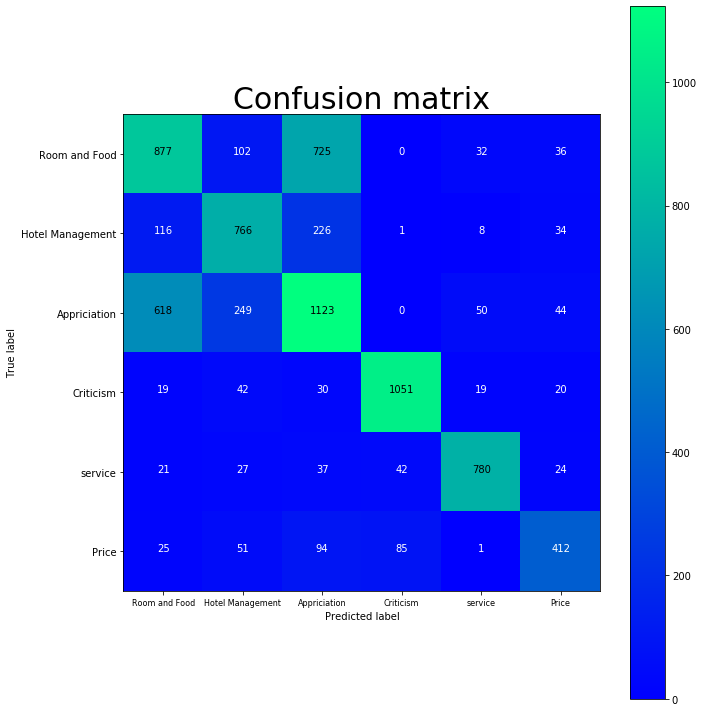

[[ 877  102  725    0   32   36]
 [ 116  766  226    1    8   34]
 [ 618  249 1123    0   50   44]
 [  19   42   30 1051   19   20]
 [  21   27   37   42  780   24]
 [  25   51   94   85    1  412]]


In [79]:
cm = confusion_matrix(test.Is_Response, predict_test)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Room and Food', 'Hotel Management', 'Appriciation', 'Criticism','service', 'Price'],
                             normalize=False, title='Confusion matrix')
plt.show()
print(cm)

# Model Pipe Lining For New Prediction

In [80]:
# define the stages of the pipeline
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data                            
pipeline.fit(train.Description, train.Is_Response)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterward...
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),


# Predicting The New Speech to Text Data

In [81]:
# Customer Call Data
text= validation['cust']

# predict the label using the pipeline
i=pipeline.predict(text)

#Converting the pandas series to dataframe
text=text.to_frame()

#Converting the numpy array to dataframe
i=pd.DataFrame(i)

#Renaming the column Name
i.rename(columns = {0 :'Is_Response'}, inplace = True)

#Concatinating the Dataframe and Display the Final Result
Final=pd.concat([text, i],axis=1)

#Finding the Word Count of Prediction File
Final['word_count'] = Final['cust'].apply(lambda x: len(str(x).split(" ")))

#Finding the Call Duration of Pediction File
Final['call_duration_secs']= Final['word_count']/10800 * 3600

#Finding the Sentiment of the Prediciton File
Prediction_result = Final[['cust','Is_Response','call_duration_secs']]

def detect_polarity(cust):
    return TextBlob(cust).sentiment.polarity
Prediction_result['polarity'] = Prediction_result.cust.apply(detect_polarity)

#Print the Prediction Result
Prediction_result[['cust','call_duration_secs','polarity','Is_Response']]

,cust,call_duration_secs,polarity,Is_Response
0,now spirit item no poison work and his wife,3.000000,0.000000,Criticism
1,hi this is Shrinath my husband and I have stayed in this hotel a few times do not the fanciest hotel we love the fact that we can walk the 900 miles to send it is screen on the staff is very accommodating my only come. Is that define in the bathroom was noisy and went automatically when U turn light on thank you,21.666667,0.180000,Appriciation
2,hi myself Shrinath I book the hotel through hot wear at the lowest price I could fine when we got their different as manager gave us smoking room argued that I have a little baby and I would not have booked the room had I known it was smoking the manager would not hear anything and told me that hardware books the cheapest rooms are available,22.333333,0.175833,Price
3,hi my friend heart I stayed in a hotel for Fast Five days and I am calling to the customer care for further information needed and the service provided so the rooms are not it clean could you please make someone to clean the room,15.333333,0.233333,Appriciation


# THE END